In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('final_dataset.csv')

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df['Weekend Return'] = df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'VVM10'])
    df = df.astype(float)

    return df
def lgbm_grid_search():

    df = encoder(pd.read_csv('proba.csv'))

    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Define the grid of hyperparameters to search
    param_grid = {
        'num_leaves': [31, 62, 127],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 400]
    }

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Extract the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    test_accuracy = best_model.score(X_test, y_test)
    print("Best Model Parameters:", grid_search.best_params_)
    print("Test Set Accuracy:", test_accuracy)

    # Optionally, plot feature importances (requires matplotlib)
    lgb.plot_importance(best_model)
    plt.show()


def main():
    lgbm_grid_search()

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1765, number of negative: 1958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474080 -> initscore=-0.103773
[LightGBM] [Info] Start training from score -0.103773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

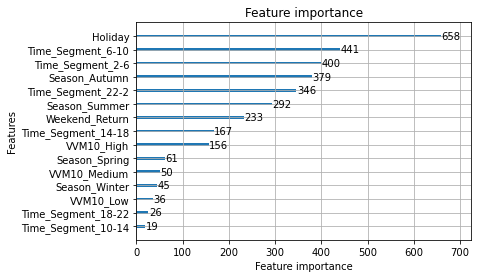

In [15]:
main()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
def light_model():
    df = encoder(pd.read_csv('proba.csv'))
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=31)

    # Initialize GridSearchCV
   
    # Fit GridSearchCV
    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Calculate accuracy

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    lgb.plot_importance(model)
    plt.show()
    
def main():
    light_model()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1765, number of negative: 1958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474080 -> initscore=-0.103773
[LightGBM] [Info] Start training from score -0.103773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

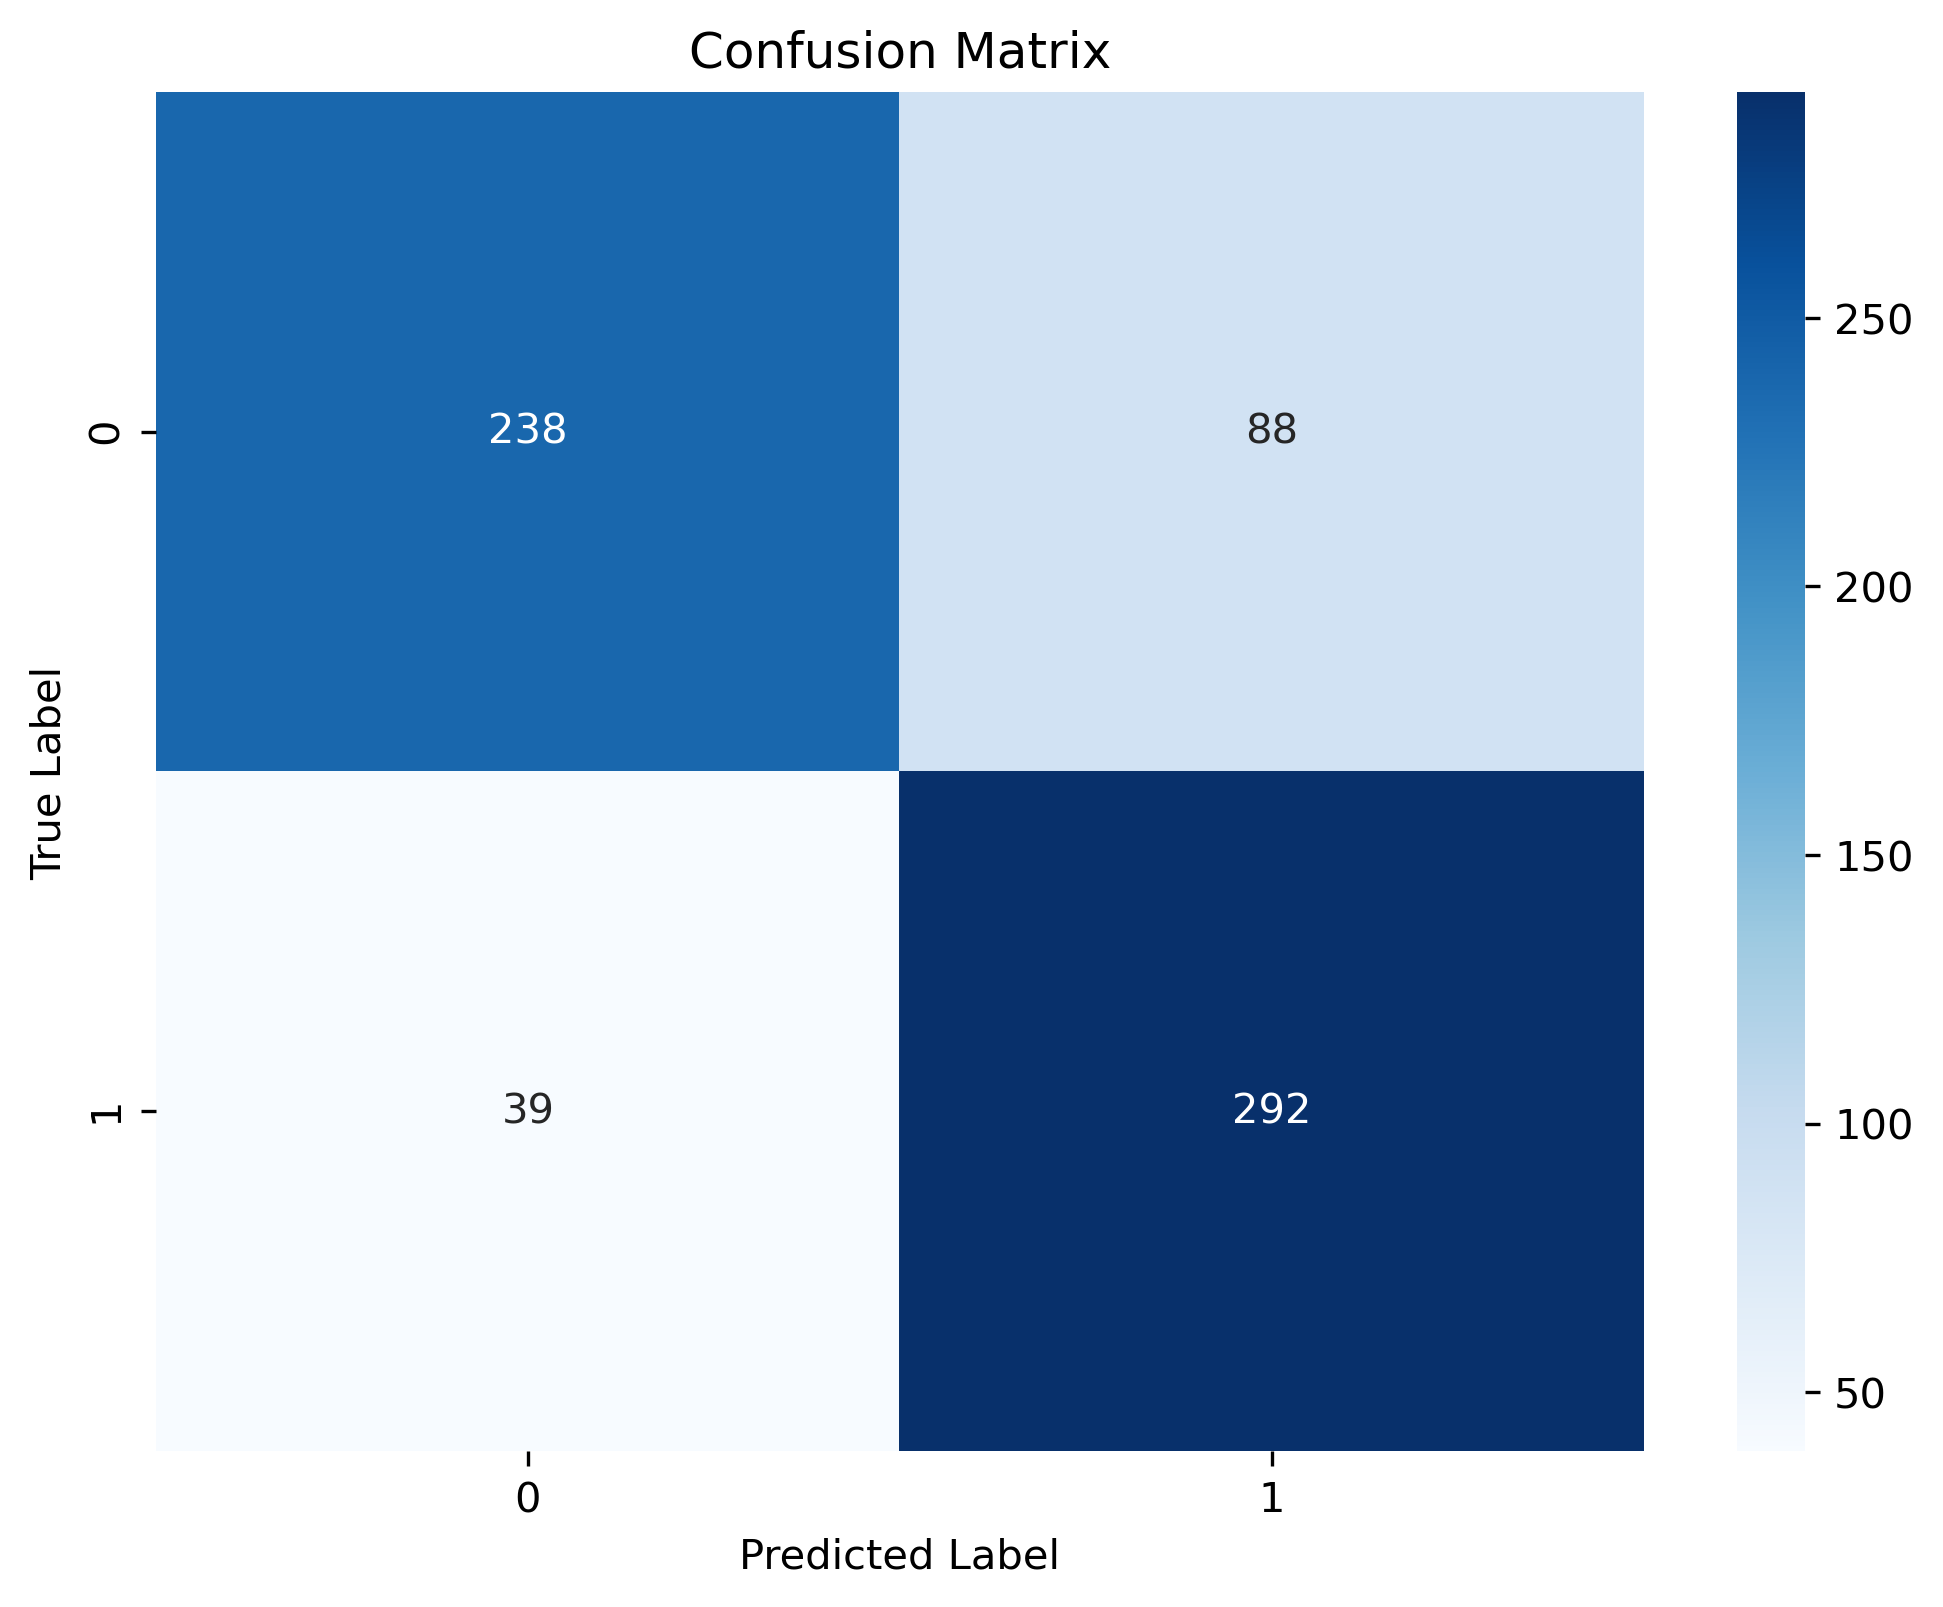

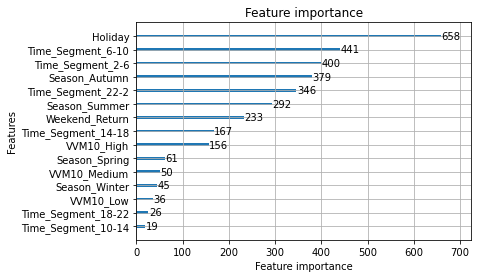

In [17]:
main()